
## Mixture Density Networks

This technique was proposed by Christopher M. Bishop in 1994. It is a type of PDF shaping regression technique using gaussian distributions only. 

The paper: https://publications.aston.ac.uk/id/eprint/373/1/NCRG_94_004.pdf



In [ ]:
##############################################################
## 
## Mixture Density Networks (MDN)
##
## 2022
## 
##############################################################

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

###############################################################

epochs = 500
batch_size = 50
learning_rate = 0.0003
sigma_0 = 0.1
samples = 50
display_step = 50

###############################################################



## The Probability Density Function of the Normal Distribution

<br/>

<center>
    
$ \large p(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}} e^{- \frac{(x - \mu)^2}{2 \sigma ^2}} $
    
</center>

<br/>

0.000512634165158752
0.004507890676188384
[0.04993575 0.04993575 0.199743   0.399486   0.2996145  0.64916474
 0.84890774 1.19845799 1.79768698 2.19717297 2.59665897 3.84505271
 3.64530971 3.99485995 3.74518121 4.5441532  3.84505271 3.99485995
 2.99614497 1.94749423 2.29704447 1.54800823 0.99871499 0.79897199
 0.64916474 0.0998715  0.399486   0.0998715  0.14980725 0.04993575]
[-0.29596338 -0.27593765 -0.25591191 -0.23588618 -0.21586045 -0.19583471
 -0.17580898 -0.15578325 -0.13575751 -0.11573178 -0.09570605 -0.07568031
 -0.05565458 -0.03562885 -0.01560311  0.00442262  0.02444835  0.04447409
  0.06449982  0.08452555  0.10455129  0.12457702  0.14460275  0.16462849
  0.18465422  0.20467995  0.22470569  0.24473142  0.26475715  0.28478289
  0.30480862]
(31,)


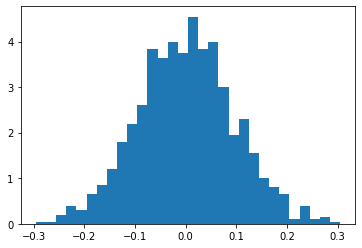

In [34]:


mu_rc    = 0         ## zero mean
sigma_rc = 0.1       ## standard deviation

s_rc = np.random.normal(mu_rc, sigma_rc, 1000)

## verify the mean and variance

print(  abs(mu_rc     -  np.mean(s_rc))  )
print(  abs(sigma_rc  -  np.std(s_rc, ddof=1)))


## Display the histogram of the samples, and the PDF function

count, bins, ignored = plt.hist(s_rc, 30, density=True)

print(count)
print(bins)
print(bins.shape)


In [35]:

def gaussian_pdf(x):
    return 1/(sigma_rc * np.sqrt(2 * np.pi)) * np.exp( - (x - mu_rc)**2 / (2 * sigma_rc**2))


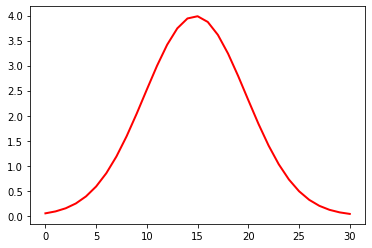

In [40]:

plt.plot(gaussian_pdf(bins), linewidth=2, color='r')


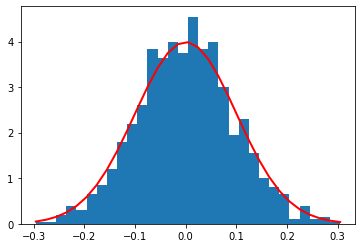

In [41]:

count, bins, ignored = plt.hist(s_rc, 30, density=True)
plt.plot(bins, gaussian_pdf(bins), linewidth=2, color='r')
plt.show()


In [42]:

###############################################################

def f(x):
    return x**2-6*x+9 

###############################################################
## the sigma*x is what increases the error proportionally as
## x grows

def data_generator(x, sigma_0, samples):
    ##                      mean     standard dev      
    return np.random.normal(f(x),    sigma_0*x,     samples)


In [43]:



###############################################################

'''

def mdn_cost(mu, sigma, y):
    dist = tfp.distributions.Normal(loc=mu, scale=sigma)
    return tf.reduce_mean(-dist.log_prob(y))

'''
###############################################################



'\n\ndef mdn_cost(mu, sigma, y):\n    dist = tfp.distributions.Normal(loc=mu, scale=sigma)\n    return tf.reduce_mean(-dist.log_prob(y))\n\n'

## Data x for quadratic curve

In [44]:
x_vals = np.arange(1, 5.2, 0.2)
print(x_vals)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5. ]


## Data points for scatter x to y with error

In [45]:


x_arr = np.array([])
y_arr = np.array([])


for x in x_vals:
    ## for every sample in x_vals, generate n=50 normal dist samples for y_arr
    x_arr = np.append(    x_arr,   np.full(samples, x)                       )
    y_arr = np.append(    y_arr,   data_generator(x, sigma_0, samples)       )

   
    
x_arr, y_arr   =   shuffle(x_arr, y_arr)

## x_test         =   np.arange( 1.1, 5.1, 0.2)




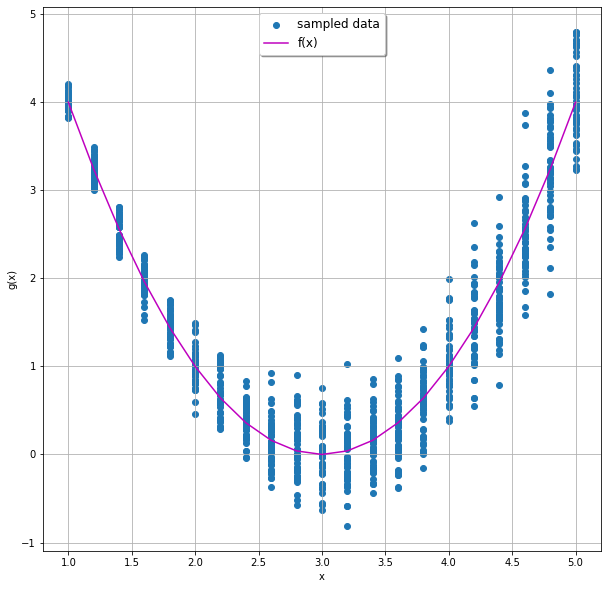

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('g(x)')

ax.scatter(x_arr,y_arr,label='sampled data')

ax.plot( x_vals, list(map(f,x_vals)), c='m', label='f(x)')

ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

In [ ]:
'''
##################################################################




model = Sequential()
model.add(Dense(12,input_shape=(1,),activation="tanh"))
model.add(Dense(12,activation="tanh"))
model.add(Dense(1,activation="linear"))
adamOptimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mse',optimizer=adamOptimizer,metrics=['mse'])

history_cache = model.fit(x_arr,
                          y_arr,
                          verbose=0, # write =1 if you wish to see the progress for each epoch
                          epochs=epochs,
                          batch_size=batch_size)
                          
                          
y_pred = model.predict(x_test)


fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(x_arr,y_arr,c='b',label='sampled data')
ax.scatter(x_test,y_pred,c='r',label='predicted values')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()
print('Final cost: {0:.4f}'.format(history_cache.history['mse'][-1]))


###############################################################################



InputLayer = Input(shape=(1,))
Layer_1 = Dense(12,activation="tanh")(InputLayer)
Layer_2 = Dense(12,activation="tanh")(Layer_1)
mu = Dense(1, activation="linear")(Layer_2)
sigma = Dense(1, activation=lambda x: tf.nn.elu(x) + 1)(Layer_2)
y_real = Input(shape=(1,))
lossF = mdn_cost(mu,sigma,y_real)
model = Model(inputs=[InputLayer, y_real], outputs=[mu, sigma])
model.add_loss(lossF)
adamOptimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adamOptimizer,metrics=['mse'])
history_cache = model.fit([x_arr, y_arr], #notice we are using an input to pass the real values due to the inner workings of keras
                          verbose=0, # write =1 if you wish to see the progress for each epoch
                          epochs=epochs,
                          batch_size=batch_size)
                          
print('Final cost: {0:.4f}'.format(history_cache.history['loss'][-1]))

mu_pred, sigma_pred = model.predict(list((x_test,x_test))) 
# the model expects a list of arrays as it has 2 inputs


fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.errorbar(x_test,mu_pred,yerr=np.absolute(sigma_pred),c='r',ls='None',marker='.',
                                    ms=10,label='predicted distributions')
                                    
ax.scatter(x_arr,y_arr,c='b',alpha=0.05,label='sampled data')
ax.errorbar(x_vals,list(map(f,x_vals)),yerr=list(map(lambda x: sigma_0*x,x_vals)),c='b',
                                lw=2,ls='None',marker='.',ms=10,label='true distributions')
                                
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

'''


